In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import re
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
import string

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd 
df=pd.read_csv('/content/gdrive/MyDrive/Depression System Analysis/DataForDepressionSA.csv', usecols=[0, 1])

In [ ]:
df

,Username,text
0,Lee Tate,"I’m feeling extremely fatigued, like I can bar..."
1,Linda Badman,I know how your feeling but when you get down ...
2,Heather D Henline,Trying to lift myself up and say I don't have ...
3,裴嫚妮,Does anyone else use Marijuana to self medicat...
4,Jason Linda,I know how your feeling but when you get down ...
...,...,...
624,Muhammad Ahmad Amin,"I have a serious problem, does it ecer happen ..."
625,Chem Buff,I'm a failure. No matter how many times I appl...
626,Ndenza Amahololo,Some times I can feel like would brake windows...
627,Tebogo Tebza,I just find out that my lovely girlfriend was ...


In [ ]:
def cleanTxt(df):
    df = re.sub(r'@[A-Za-z0-9]+', '', str(df)) #Removing mentions
    df = re.sub(r'#[A-Za-z0-9]+', '', df)  #Removing hastags
    df = re.sub(r'RT[\s]+', '', df)   #Removing RTs
    df = re.sub(r'https?:\/\/\S+', '', df) #Removing URLs (generally promotional posts)
    return df
df['text'] = df['text'].apply(cleanTxt)
df

,Username,text
0,Lee Tate,"I’m feeling extremely fatigued, like I can bar..."
1,Linda Badman,I know how your feeling but when you get down ...
2,Heather D Henline,Trying to lift myself up and say I don't have ...
3,裴嫚妮,Does anyone else use Marijuana to self medicat...
4,Jason Linda,I know how your feeling but when you get down ...
...,...,...
624,Muhammad Ahmad Amin,"I have a serious problem, does it ecer happen ..."
625,Chem Buff,I'm a failure. No matter how many times I appl...
626,Ndenza Amahololo,Some times I can feel like would brake windows...
627,Tebogo Tebza,I just find out that my lovely girlfriend was ...


In [ ]:
 from textblob import TextBlob
#Function for getting subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Function for getting polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Creating new columns
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)
df

,Username,text,Subjectivity,Polarity
0,Lee Tate,"I’m feeling extremely fatigued, like I can bar...",0.690000,-0.195000
1,Linda Badman,I know how your feeling but when you get down ...,0.429630,0.281481
2,Heather D Henline,Trying to lift myself up and say I don't have ...,0.533965,-0.325836
3,裴嫚妮,Does anyone else use Marijuana to self medicat...,0.358333,-0.137500
4,Jason Linda,I know how your feeling but when you get down ...,0.429630,0.281481
...,...,...,...,...
624,Muhammad Ahmad Amin,"I have a serious problem, does it ecer happen ...",0.595238,-0.036905
625,Chem Buff,I'm a failure. No matter how many times I appl...,0.512500,-0.027083
626,Ndenza Amahololo,Some times I can feel like would brake windows...,0.500000,0.000000
627,Tebogo Tebza,I just find out that my lovely girlfriend was ...,0.575000,0.350000


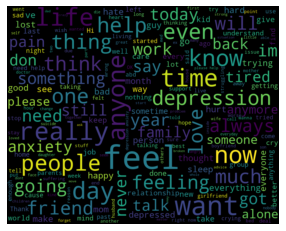

In [ ]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Sentiment analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Class'] = df['Polarity'].apply(getAnalysis)

df

,Username,text,Subjectivity,Polarity,Class
0,Lee Tate,"I’m feeling extremely fatigued, like I can bar...",0.690000,-0.195000,Negative
1,Linda Badman,I know how your feeling but when you get down ...,0.429630,0.281481,Positive
2,Heather D Henline,Trying to lift myself up and say I don't have ...,0.533965,-0.325836,Negative
3,裴嫚妮,Does anyone else use Marijuana to self medicat...,0.358333,-0.137500,Negative
4,Jason Linda,I know how your feeling but when you get down ...,0.429630,0.281481,Positive
...,...,...,...,...,...
624,Muhammad Ahmad Amin,"I have a serious problem, does it ecer happen ...",0.595238,-0.036905,Negative
625,Chem Buff,I'm a failure. No matter how many times I appl...,0.512500,-0.027083,Negative
626,Ndenza Amahololo,Some times I can feel like would brake windows...,0.500000,0.000000,Neutral
627,Tebogo Tebza,I just find out that my lovely girlfriend was ...,0.575000,0.350000,Positive


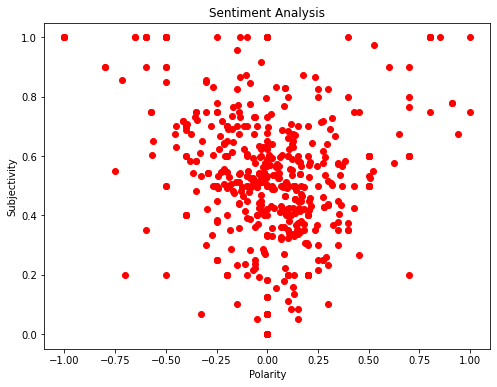

In [ ]:
# Scatter-Plot the polarity and subjectivity in graph
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of positive tweets
ptweets = df[df.Class == 'Positive']
ptweets = ptweets['text']
round((ptweets.shape[0]/df.shape[0]*100), 1)

40.5

In [ ]:
# Get the percentage of negative tweets
ntweets = df[df.Class == 'Negative']
ntweets = ntweets['text']
round((ntweets.shape[0]/df.shape[0]*100), 1)

36.6

In [ ]:
# Get the percentage of neutral tweets
nttweets = df[df.Class == 'Neutral']
nttweets = nttweets['text']
round((nttweets.shape[0]/df.shape[0]*100), 1)

22.9

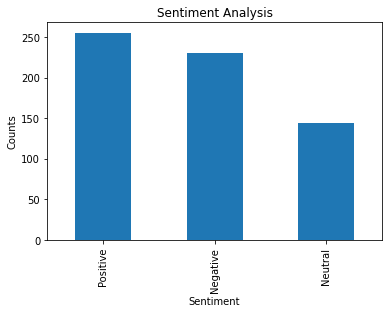

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')
plt.show()